<a href="https://colab.research.google.com/github/Harsh374/Elevate-Labs-Task-8/blob/main/Elevate_Labs_Task_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 8: Clustering with K-Means**



*   Objective: Perform unsupervised learning with K-Means clustering.
*   Tools: Scikit-learn, Pandas, Matplotlib
*   Dataset: Ma l Customer Segmentation Dataset
*   What You'll Learn :  Clustering, unsupervised learning, cluster evaluation.



# **Step 1: Load and Visualize Dataset**

In [26]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [27]:
# Load dataset
df = pd.read_csv('/content/Mall_Customers.csv')
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


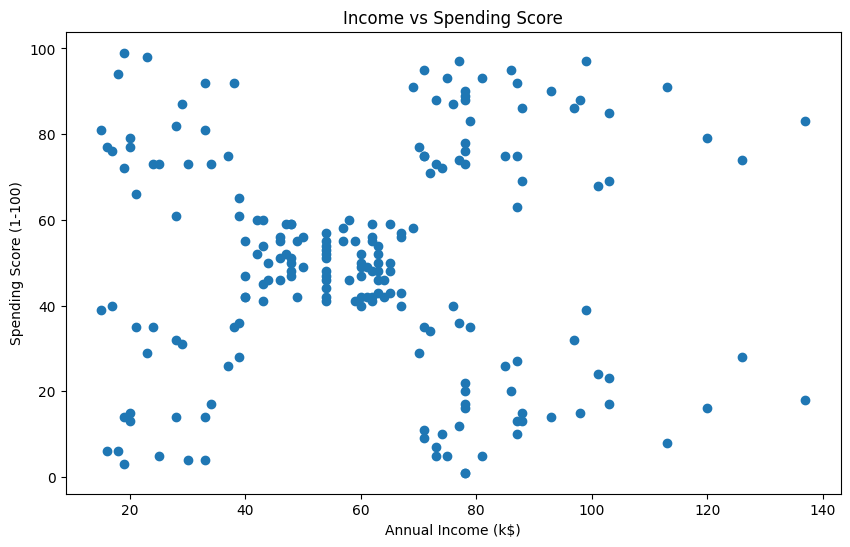

In [28]:
# Basic visualization
plt.figure(figsize=(10, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Income vs Spending Score')
plt.show()

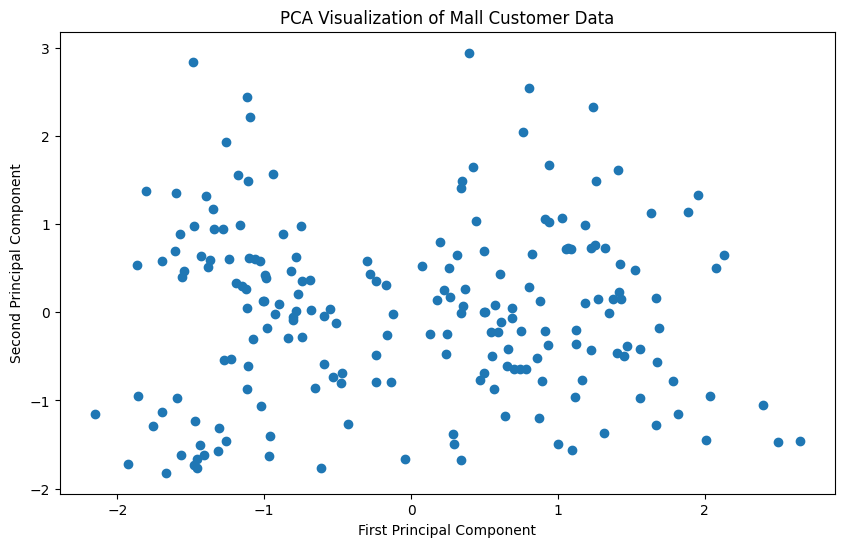

In [29]:
# Optional: PCA for dimensionality reduction if using more than 2 features
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

plt.figure(figsize=(10, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Visualization of Mall Customer Data')
plt.show()

# **Step 2: Fit K-means and Assign Cluster Labels**

In [30]:
# Prepare data for clustering (using two features for simplicity)
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [31]:
# Choose an initial K value
k = 5

In [32]:
# Apply K-means
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

In [33]:
# Add cluster labels to original dataframe
df['Cluster'] = y_kmeans

# **Step 3: Find Optimal K using the Elbow Method**

In [34]:
# Calculate WCSS (Within-Cluster Sum of Square) for different K values
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

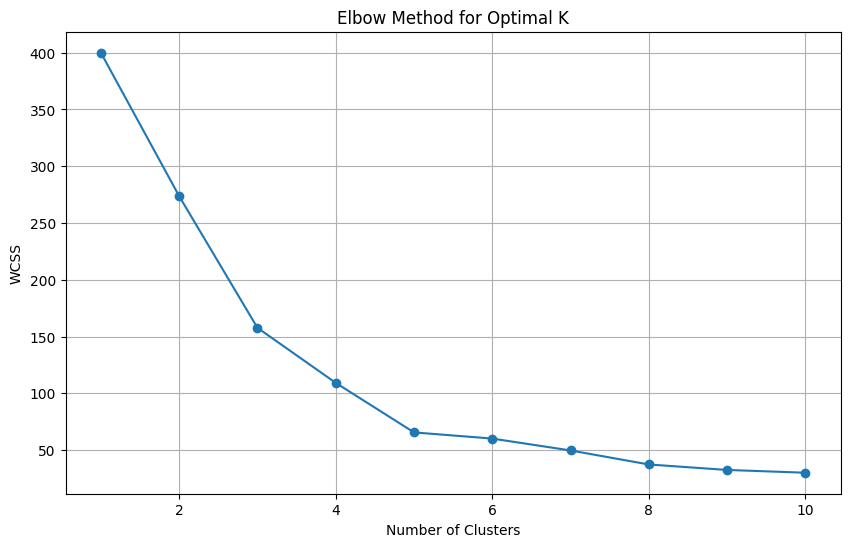

In [35]:
# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

In [36]:
# Based on the elbow point, select optimal K
optimal_k = 5

# **Step 4: Visualize Clusters with Color-Coding**

In [37]:
# Apply K-means with optimal K
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

In [38]:
# Get cluster centers in original scale
centers = scaler.inverse_transform(kmeans.cluster_centers_)

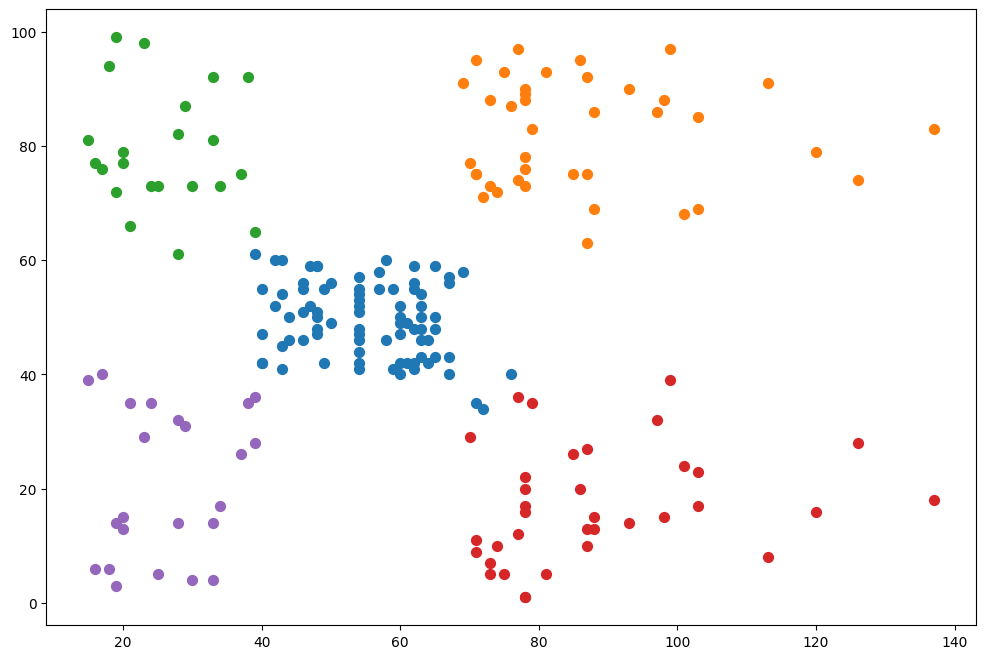

In [39]:
# Visualize the clusters
plt.figure(figsize=(12, 8))
for cluster in range(optimal_k):
    plt.scatter(X[y_kmeans == cluster, 0], X[y_kmeans == cluster, 1],
                s=50, label=f'Cluster {cluster}')

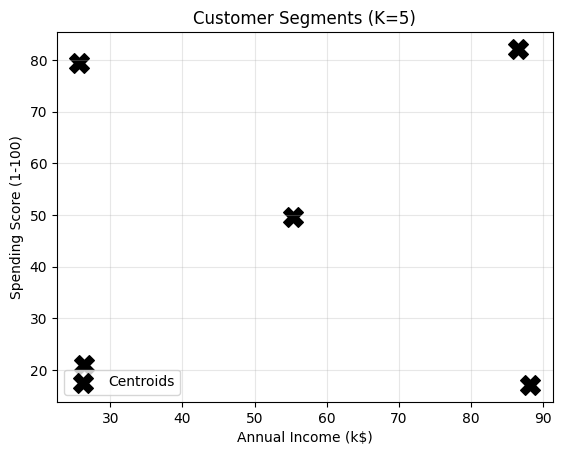

In [40]:
# Plot centroids
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, marker='X', label='Centroids')
plt.title(f'Customer Segments (K={optimal_k})')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# **Step 5: Evaluate Clustering using Silhouette Score**

In [41]:
# Calculate silhouette scores for different K values
silhouette_scores = []
for k in range(2, 11):  # Silhouette score requires at least 2 clusters
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {k}, the silhouette score is {silhouette_avg:.3f}")

For n_clusters = 2, the silhouette score is 0.397
For n_clusters = 3, the silhouette score is 0.467
For n_clusters = 4, the silhouette score is 0.494
For n_clusters = 5, the silhouette score is 0.555
For n_clusters = 6, the silhouette score is 0.514
For n_clusters = 7, the silhouette score is 0.502
For n_clusters = 8, the silhouette score is 0.455
For n_clusters = 9, the silhouette score is 0.457
For n_clusters = 10, the silhouette score is 0.445


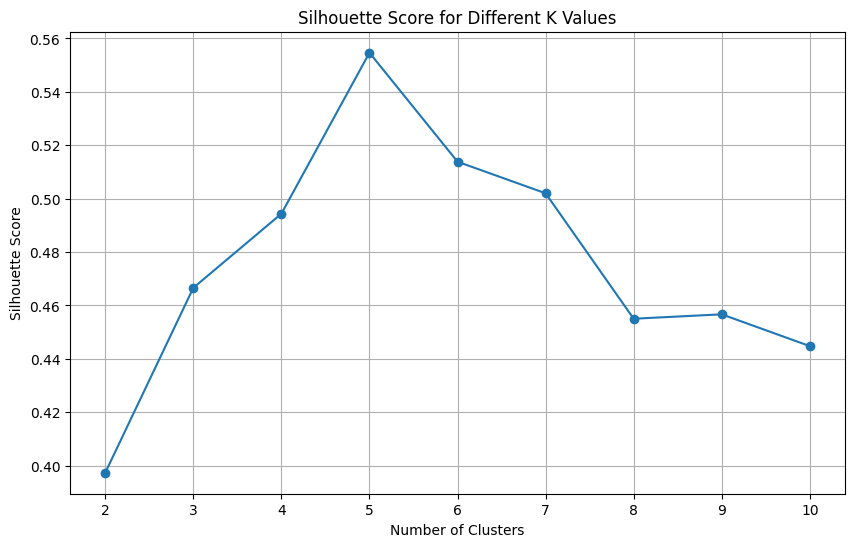

In [42]:
# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different K Values')
plt.grid(True)
plt.show()

In [43]:
# Choose K with highest silhouette score
best_k = np.argmax(silhouette_scores) + 2  # +2 because we started from K=2
print(f"Best K based on Silhouette Score: {best_k}")

Best K based on Silhouette Score: 5


# **Bonus: Interpret the Clusters**

In [44]:
# Add cluster labels to original dataframe with optimal K
kmeans_final = KMeans(n_clusters=best_k, init='k-means++', random_state=42)
df['Cluster'] = kmeans_final.fit_predict(X_scaled)

In [45]:
# Analyze clusters
cluster_summary = df.groupby('Cluster').agg({
    'Age': 'mean',
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean',
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'Count'})

print("\nCluster Summary:")
print(cluster_summary)


Cluster Summary:
               Age  Annual Income (k$)  Spending Score (1-100)  Count
Cluster                                                              
0        42.716049           55.296296               49.518519     81
1        32.692308           86.538462               82.128205     39
2        25.272727           25.727273               79.363636     22
3        41.114286           88.200000               17.114286     35
4        45.217391           26.304348               20.913043     23


In [46]:
# Describe each cluster
for i in range(best_k):
    print(f"\nCluster {i} characteristics:")
    print(f"- Size: {len(df[df['Cluster'] == i])} customers")
    print(f"- Average Age: {df[df['Cluster'] == i]['Age'].mean():.1f}")
    print(f"- Average Income: ${df[df['Cluster'] == i]['Annual Income (k$)'].mean():.1f}k")
    print(f"- Average Spending Score: {df[df['Cluster'] == i]['Spending Score (1-100)'].mean():.1f}")


Cluster 0 characteristics:
- Size: 81 customers
- Average Age: 42.7
- Average Income: $55.3k
- Average Spending Score: 49.5

Cluster 1 characteristics:
- Size: 39 customers
- Average Age: 32.7
- Average Income: $86.5k
- Average Spending Score: 82.1

Cluster 2 characteristics:
- Size: 22 customers
- Average Age: 25.3
- Average Income: $25.7k
- Average Spending Score: 79.4

Cluster 3 characteristics:
- Size: 35 customers
- Average Age: 41.1
- Average Income: $88.2k
- Average Spending Score: 17.1

Cluster 4 characteristics:
- Size: 23 customers
- Average Age: 45.2
- Average Income: $26.3k
- Average Spending Score: 20.9
